In [1]:
import torch

import numpy as np

from src.model.models import VAE, Diffusion, Flow, DBModelSmall
from src.data.generators import get_moons_dataset
from src.data.samplers import sample_vae, sample_diffusion, sample_flow
from src.visualization.visualize import plot_decision_boundary

### Variational Autoencoder

In [3]:
model = VAE()
model.load_state_dict(torch.load("../models/autoencoders/vae_dbloss_aligned/vae.pth"))
model.eval()

classifier = DBModelSmall(batch_first=False)
classifier.eval()

DBModelSmall(
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

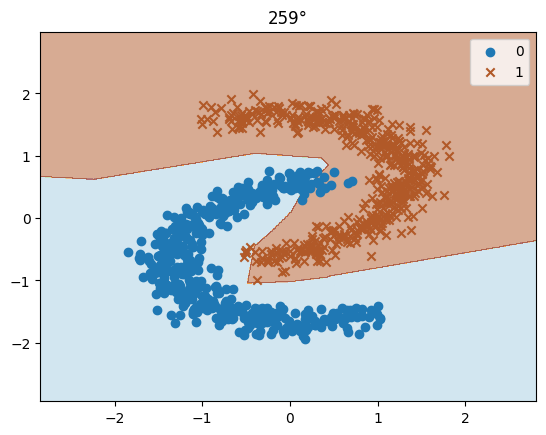

In [17]:
angle = np.random.randint(0, 360)
params = sample_vae(model, angle)
classifier.set_weights(params)

X, y = get_moons_dataset(angle=angle)
plot_decision_boundary(classifier, X, y, title=f"{angle}°")

### Diffusion

In [2]:
model = Diffusion()
model.load_state_dict(torch.load("../models/generators/diffusion/diffusion_conditional.pth"))
model.eval()

classifier = DBModelSmall(batch_first=False)
classifier.eval()

DBModelSmall(
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

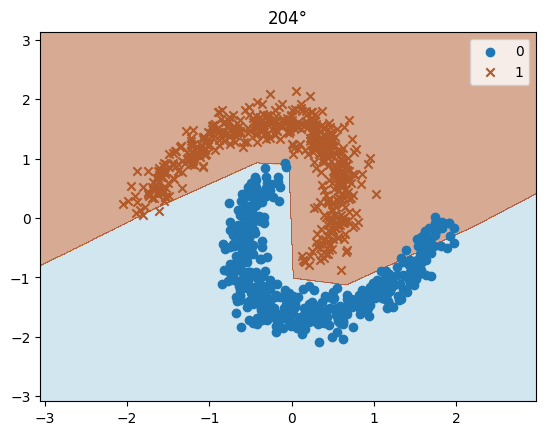

In [5]:
angle = np.random.randint(0, 360)
params = sample_diffusion(model, angle)
classifier.set_weights(params)

X, y = get_moons_dataset(angle=angle)
plot_decision_boundary(classifier, X, y, title=f"{angle}°")

### Flow Matching

In [6]:
model = Flow()
model.load_state_dict(torch.load("../models/generators/flow_matching/flow_conditional.pth"))
model.eval()

classifier = DBModelSmall(batch_first=False)
classifier.eval()

DBModelSmall(
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

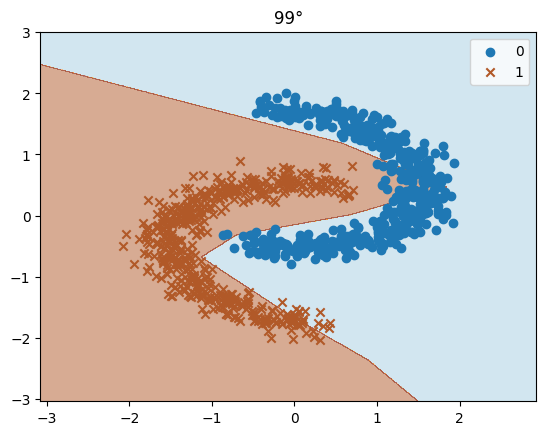

In [10]:
angle = np.random.randint(0, 360)
params = sample_flow(model, angle)
classifier.set_weights(params)

X, y = get_moons_dataset(angle=angle)
plot_decision_boundary(classifier, X, y, title=f"{angle}°")